## Pre-Processing the dataset
* After cleaning and visualizing the dataset. This includes feature normalization, converting categorical values to numeric and dimensionality reduction


In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
from scipy.stats import norm
import seaborn as sns 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


plt.style.use('fivethirtyeight')
sns.set_style("white")
plt.rcParams['figure.figsize'] = (8,4) 

data = pd.read_csv('data.csv', index_col=False)
data.drop('id',axis=1, inplace=True)
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [14]:
# Assigning features inot X, labels (diagnosis column) into y 
data_ = data.values
X = data_[:,1:31] # 
y = data_[:,0]

In [15]:
# Converting categorical data into numerical data (diagnosis column contains M,B)
# After this, malignant = 1, benign = 0
le = LabelEncoder()
y = le.fit_transform(y)

## Splitting the dataset
* Training set used used to train the model 
* Test set to evaluate the model once it is fitted
* This is done using different flavors of the variables X and y
* Default split is 75% train / 25% test
* This can be verfied using X.shape. e.g. X_train.shape

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((426, 30), (426,), (143, 30), (143,))

## Feature Normalization
The data in this dataset has different distributions as seen in the previous visualization step. This is not ideal for some machine learning algorithms (some algorithms don't require normalization to perform well). Scaling the different features in this dataset to be on the same scale (mean of 0 and a standard deviation of 1) is crucial. Espcially when using algorithms with regularization. 
Normalization helps apply regularization more fairly to all features (in a sense)

In [5]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

C:\Users\AdamO\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\AdamO\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


## Dimensionality reduction: Principal Component Analysis
* In the visualization step, some features showed better ability to split the classes within the dataset 
* Using PCA, we can reduce the dimensionality of the dataset to use a subset of the features, the more informative ones (The ones that are more able to classify the samples)

In [17]:
pca = PCA(n_components=10).fit(X_scaled)
X_pca = pca.transform(X_scaled)
print(X.shape, X_pca.shape)

(569, 30) (569, 10)


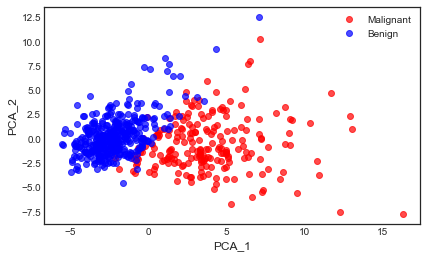

In [7]:
PCA_df = pd.DataFrame()

PCA_df['PCA_1'] = X_pca[:,0]
PCA_df['PCA_2'] = X_pca[:,1]

plt.plot(PCA_df['PCA_1'][data.diagnosis == 'M'],PCA_df['PCA_2'][data.diagnosis == 'M'],'o', alpha = 0.7, color = 'r')
plt.plot(PCA_df['PCA_1'][data.diagnosis == 'B'],PCA_df['PCA_2'][data.diagnosis == 'B'],'o', alpha = 0.7, color = 'b')

plt.xlabel('PCA_1')
plt.ylabel('PCA_2')
plt.legend(['Malignant','Benign'])
plt.show()

#### The above shows the reduced version of the dataset. 

## Scree plot
When deciding how many Principal Components to use in the model, a scree plot is very helpful. pca() has an attribute called (explained_variance_ratio_) which is the amount of variance from each component. 

Text(0,0.5,'Eigenvalue')

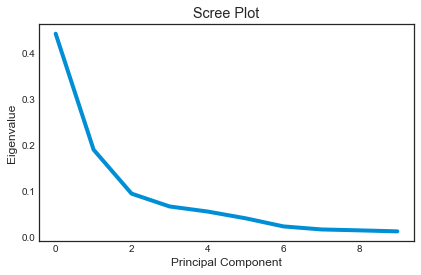

In [11]:
var= pca.explained_variance_ratio_

plt.plot(var)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')

### By examining the above plot:
The most dramatic change in the slop takes place around components 1,2 and 3